<a href="https://colab.research.google.com/github/alexsantostavares/TensorflowMLP/blob/master/TensorFlowMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# garantir que seja instalado recurso utilizado
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
#importando todas as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import sys
import csv

In [98]:
#leitura do arquivo csv
df = pd.read_csv("/content/dataset/BD-2trab(CSV) (1).csv")

In [99]:
df

,Alternativo,Bar,Sex/Sab,Faminto,Cliente,Preço,Chove,Reserva,Tipo,Espera,Meta
0,Sim,Não,Não,Sim,Alg,$$$,Não,Sim,Fra,0-10,Sim
1,Sim,Não,Não,Sim,Che,$,Não,Não,Tai,30-60,Não
2,Não,Sim,Não,Não,Alg,$,Não,Não,Ham,0-10,Sim
3,Sim,Não,Sim,Sim,Che,$,Sim,Não,Tai,10-30,Sim
4,Sim,Não,Sim,Não,Che,$$$,Não,Sim,Fra,>60,Não
5,Não,Sim,Não,Sim,Alg,$$,Sim,Sim,Ita,0-10,Sim
6,Não,Sim,Não,Não,Ne,$,Sim,Não,Ham,0-10,Não
7,Não,Não,Não,Sim,Alg,$$,Sim,Sim,Tai,0-10,Sim
8,Não,Sim,Sim,Não,Che,$,Sim,Não,Ham,>60,Não
9,Sim,Sim,Sim,Sim,Che,$$$,Não,Sim,Ita,10-30,Não


In [100]:
# substituindo sim e não por 1 e 0
df = df.replace(['Sim'], 1)
df = df.replace(['Sim '], 1)
df = df.replace([' Sim'], 1)
df = df.replace(['sim'], 1)
df = df.replace(['sim '], 1)
df = df.replace([' sim'], 1)
df = df.replace(['Não'], 0)
df = df.replace(['Não '], 0)
df = df.replace([' Não'], 0)
df = df.replace(['não'], 0)
df = df.replace(['não '], 0)
df = df.replace([' não'], 0)


In [101]:
df.head()

,Alternativo,Bar,Sex/Sab,Faminto,Cliente,Preço,Chove,Reserva,Tipo,Espera,Meta
0,1,0,0,1,Alg,$$$,0,1,Fra,0-10,1
1,1,0,0,1,Che,$,0,0,Tai,30-60,0
2,0,1,0,0,Alg,$,0,0,Ham,0-10,1
3,1,0,1,1,Che,$,1,0,Tai,10-30,1
4,1,0,1,0,Che,$$$,0,1,Fra,>60,0


In [102]:
# converte string repetidas em valores numericos

mapeamento_pala = {}

for coluna in df.columns:
  if type(coluna) is str:
    contador = df[coluna].unique()
    total = len(contador)
    mapeando = dict(zip(contador, range(total)))
    mapeamento_pala[coluna] = mapeando
    df[coluna] = df[coluna].replace(mapeando)

In [118]:
df

,Alternativo,Bar,Sex/Sab,Faminto,Cliente,Preço,Chove,Reserva,Tipo,Espera,Meta
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,1,1,1
2,1,1,0,1,0,1,0,1,2,0,0
3,0,0,1,0,1,1,1,1,1,2,0
4,0,0,1,1,1,0,0,0,0,3,1
5,1,1,0,0,0,2,1,0,3,0,0
6,1,1,0,1,2,1,1,1,2,0,1
7,1,0,0,0,0,2,1,0,1,0,0
8,1,1,1,1,1,1,1,1,2,3,1
9,0,1,1,0,1,0,0,0,3,2,1


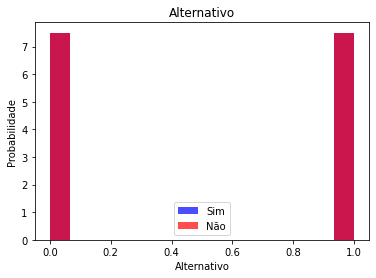

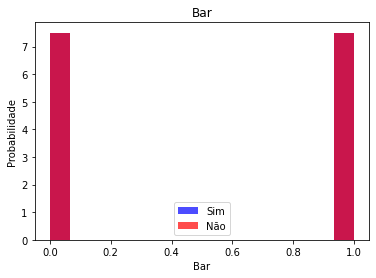

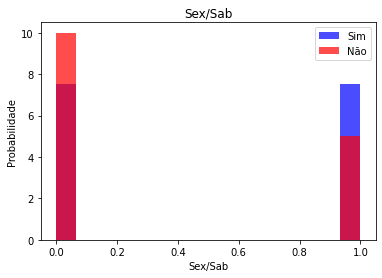

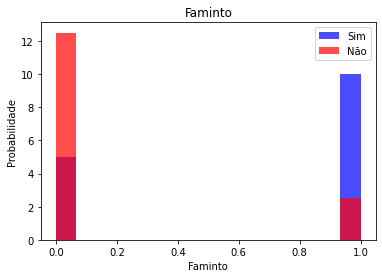

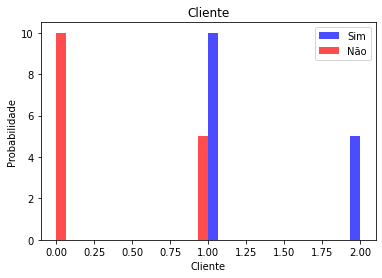

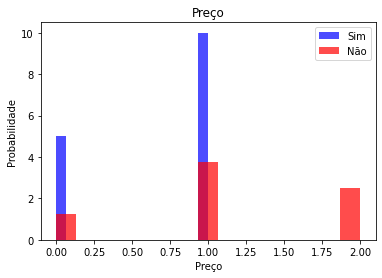

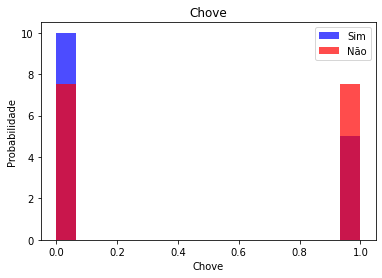

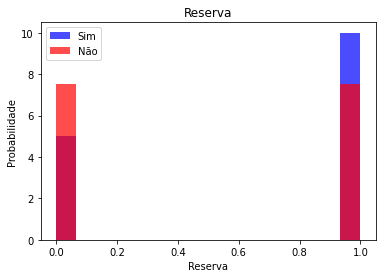

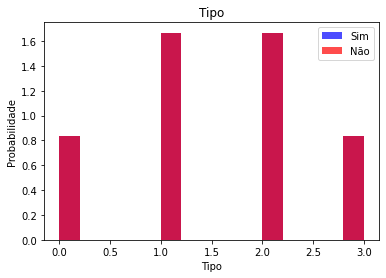

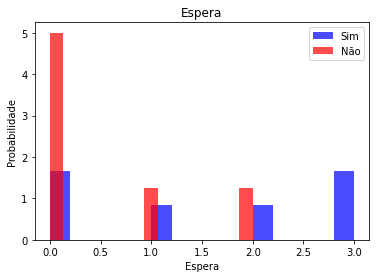

In [104]:
# mostrando todas as relações das colunas da tabela com a Meta
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Meta']== 1][label], color='blue', label="Sim", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Meta']== 0][label], color='red', label="Não", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probabilidade")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [105]:
# normalizando o formato de X e Y para que possam ser comparados
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [106]:
# Mostrando o formato
X.shape, y.shape

((12, 10), (12,))

In [107]:
# normalizando o formato de X e Y para que possam ser comparados parte 2
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [108]:
# normalizando o formato de X e Y para que possam ser comparados parte 3
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [109]:
# dispozição dos valores do meta sim,não ou 1,0
len(transformed_df[transformed_df["Meta"]==1]), len(transformed_df[transformed_df["Meta"]==0])

(6, 6)

In [110]:
# determinando os treinamentos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [111]:
# definindo a quantidade de camadas e metodo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(24, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [112]:
# mais alguns parametros e a taxa de aprendizagem
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [113]:
# pré avaliação com variaveis de treino
model.evaluate(X_train, y_train)

1/1 [==============================] - 1s 653ms/step - loss: 0.6294 - accuracy: 0.7143


[0.6293858289718628, 0.7142857313156128]

In [114]:
# pré avaliação 2
model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 19ms/step - loss: 0.7011 - accuracy: 0.5000


[0.7010912895202637, 0.5]

In [115]:
# treinamento
model.fit(X_train, y_train, batch_size=9, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6294 - accuracy: 0.7143 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 125ms/step - loss: 0.6205 - accuracy: 0.7143 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 66ms/step - loss: 0.6118 - accuracy: 0.7143 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 67ms/step - loss: 0.6033 - accuracy: 0.7143 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 96ms/step - loss: 0.5949 - accuracy: 0.7143 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.5869 - accuracy: 0.8571 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.5791 - accuracy: 0.8571 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 8/50
1/1 [============

In [116]:
# avaliação com as variaveis separadas para teste
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.6808 - accuracy: 0.6667


[0.6808058619499207, 0.6666666865348816]

In [117]:
# avaliação com todos os elementos
model.evaluate(X, y)

1/1 [==============================] - 0s 24ms/step - loss: 0.4756 - accuracy: 0.9167


[0.4756089448928833, 0.9166666865348816]